In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import sklearn.datasets

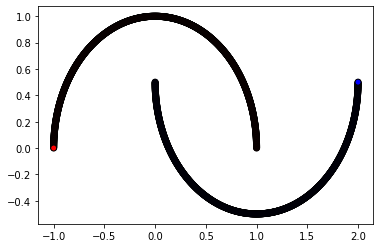

In [79]:
X, y = sklearn.datasets.make_moons(n_samples=2000, noise=0.0, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

/var/folders/5t/x4797rk12d38l3vt3ljrn4qr0000gn/T/ipykernel_72089/1849491901.py:40: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(c)


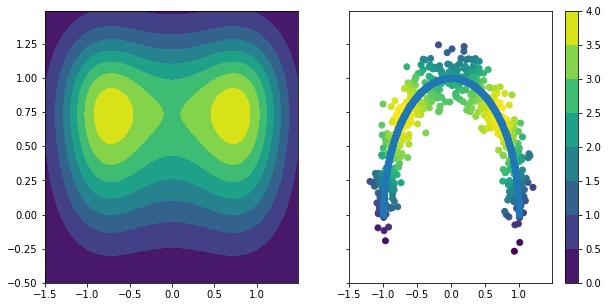

In [188]:
h=0.01
n_points = 500

def prob_gauss(X, sigma=0.1):
    points = np.linspace(0, np.pi, 1000)
    probs = np.zeros((X.shape[0], len(points)))
    for i, p in enumerate(points):
        probs[:, i] = np.exp((-1/2) * ((X-np.cos(p))**2)/sigma)
    probs = probs * 1/(sigma * (np.sqrt(2*np.pi)))
    return np.mean(probs, axis=1)
    
def prob_gauss_sin(X, sigma=0.1):
    points = np.linspace(0, np.pi, 1000)
    probs = np.zeros((X.shape[0], len(points)))
    for i, p in enumerate(points):
        probs[:, i] = np.exp((-1/2) * ((X-np.sin(p))**2)/sigma)
    probs = probs * 1/(sigma * (np.sqrt(2*np.pi)))
    return np.mean(probs, axis=1)

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, h),
                     np.arange(-0.5, 1.5, h))
xgrid = np.stack([xx.ravel(), yy.ravel()]).T

# outer_circ_x = np.cos(np.linspace(0, np.pi, 500))
# outer_circ_x_noise = outer_circ_x + np.random.normal(scale=0.1, size=outer_circ_x.shape)
# probs = prob_gauss(outer_circ_x_noise, sigma=0.1)

# plt.scatter(np.linspace(0, np.pi, 500), outer_circ_x_noise, c=probs)
outer_circ_y = np.sin(np.linspace(0, np.pi, 500))
x_outer_clean = np.stack([outer_circ_x, outer_circ_y], axis=1)
x_outer = x_outer_clean + np.random.normal(scale=0.1, size=x_outer_clean.shape)
probs = prob_gauss(x_outer[:, 0], sigma=0.1) * prob_gauss_sin(x_outer[:, 1], sigma=0.1)

probs_grid = prob_gauss(xgrid[:, 0], sigma=0.1) * prob_gauss_sin(xgrid[:, 1], sigma=0.1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
c = axs[0].contourf(xx, yy, probs_grid.reshape(xx.shape))
axs[1].scatter(x_outer[:, 0], x_outer[:, 1], c=probs)
axs[1].scatter(x_outer_clean[:, 0], x_outer_clean[:, 1])
plt.colorbar(c)

/var/folders/5t/x4797rk12d38l3vt3ljrn4qr0000gn/T/ipykernel_72089/2467074584.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return (1/(np.pi*np.sqrt(1-X**2)) / norm)


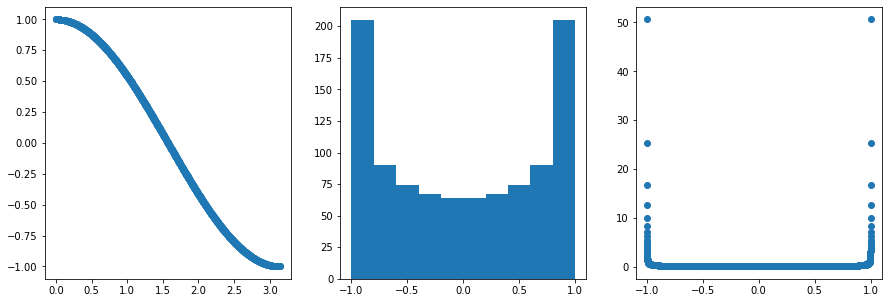

In [167]:
# Outer_circ_x
def pdf_x_outer(X):
    norm = 2
    return (1/(np.pi*np.sqrt(1-X**2)) / norm)

X = np.linspace(0, np.pi, 1000)
Y = np.cos(X)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, Y)

axs[1].hist(Y)
axs[2].scatter(Y, pdf_x_outer(Y))

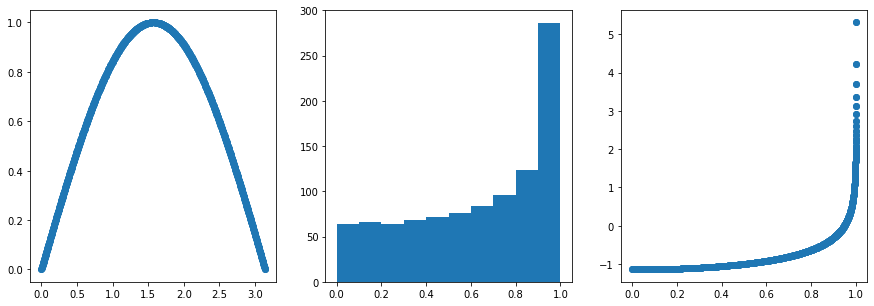

In [73]:
# Outer_circ_y
def pdf_y_outer(X):
    norm = 1
    return (1/(np.pi*np.sqrt(1-X**2)) / norm)

X = np.linspace(0, np.pi, 1000)
Y = np.sin(X)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, Y)
axs[1].hist(Y)
axs[2].scatter(Y, pdf_y_outer(Y))

/var/folders/5t/x4797rk12d38l3vt3ljrn4qr0000gn/T/ipykernel_72089/424938756.py:4: RuntimeWarning: invalid value encountered in sqrt
  return (1/(np.pi*np.sqrt(1-X**2)) / norm)
/var/folders/5t/x4797rk12d38l3vt3ljrn4qr0000gn/T/ipykernel_72089/3788562725.py:11: RuntimeWarning: invalid value encountered in log
  axs[2].scatter(Y, np.log(pdf_y_outer(Y)))


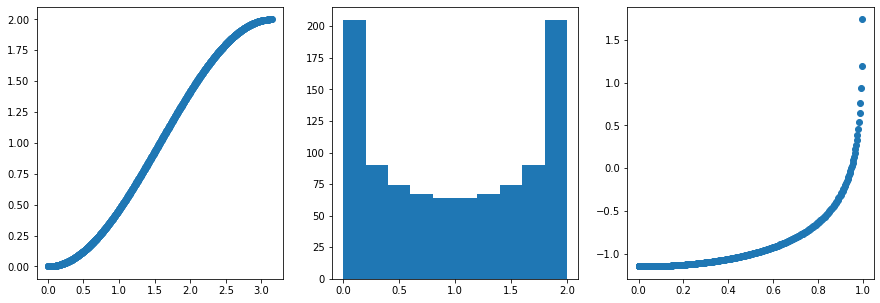

In [66]:
# Inner_circ_x
def pdf_x_inner(X):
    return 1/(np.pi*np.sqrt(1-X**2))

X = np.linspace(0, np.pi, 1000)
Y = 1-np.cos(X)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, Y)
axs[1].hist(Y)
axs[2].scatter(Y, pdf_y_outer(Y))

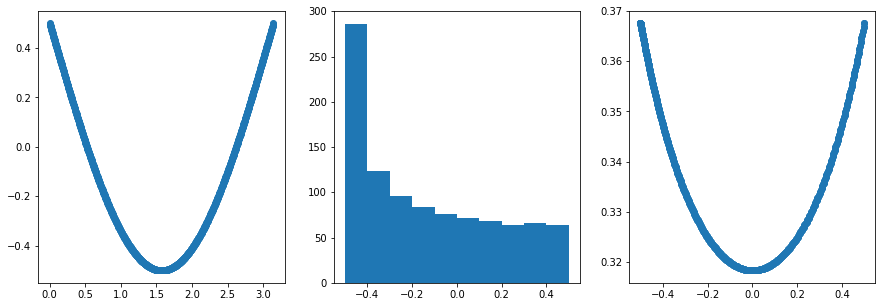

In [55]:
# Inner_circ_y
def pdf_y_inner(X):
    return 1/(np.pi*np.sqrt(1-X**2))

X = np.linspace(0, np.pi, 1000)
Y = 1-np.sin(X) - 0.5

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X, Y)
axs[1].hist(Y)
axs[2].scatter(Y, pdf_y_outer(Y))